DATA SCIENCE I - COMISION 67480 -
ALUMNO: CLAUDIO G. YVANOFF

# TEMA: ANALISIS Y PREDICCION DE PAGOS A CUENTA DECLARADOS POR UN SEGMENTO DE SUJETOS PARA EL PERIODO 2024

El dataset comprende información de ventas mensuales declaradas en la Provincia de Córdoba por un grupo ficticio de sujetos y el impuesto sobre los Ingresos Brutos abonado por dichas ventas durante el período fiscal 2024. Asimismo se incluye información sobre retenciones, percepciones, recaudaciones sufridas por éstos sujetos -denominados Pagos a Cuenta-, índices de actividad mensuales según INDEC e Indice de Precios al Consumidor, entre otros.
El objetivo de este trabajo es analizar el comportamiento de este segmento de sujetos y predecir cual va a ser el valor de pagos a cuenta que en conjunto tendrán en los últimos meses del año.  



**Hipótesis:**

1- Los pagos a cuenta presentan una alta correlación con los precios de la economía

2- Los pagos a cuenta presentan una alta correlación con el nivel de ventas - base imponible del impuesto - declarados por estos sujetos.

3- Debido a la alta volatilidad en los comportamientos individuales de los sujetos, no sería viable realizar un análisis por sujeto para luego predecir el comportamiento global.


**Pregunta de Investigación:**

Cuál será el nivel de pagos a cuenta que en conjunto declararán en los últimos meses del año 2024 estos contribuyentes.

# CONTENIDO DEL DATASET


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_excel('https://github.com/claudioyvanoff/1/raw/refs/heads/main/Dataset%20para%20Proyecto%20Final%20v3-%20Claudio%20Yvanoff.xlsx')
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13069 entries, 0 to 13068
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Codigo Sujeto               13069 non-null  int64  
 1   PERIODO                     13069 non-null  int64  
 2   Mes                         13069 non-null  int64  
 3   INGRESOS ALCANZADOS         13069 non-null  float64
 4   IMPUESTO_DETERMINADO        13069 non-null  float64
 5   PERCEPCIONES                13069 non-null  float64
 6   PERCEPCIONES_ADUANERAS      13069 non-null  float64
 7   RETENCIONES                 13069 non-null  float64
 8   RECAUDACIONES               13069 non-null  float64
 9   INGRESOS_GRAVADOS_PAIS      13069 non-null  float64
 10  INGRESOS_NO_GRAVADOS_PAIS   13069 non-null  float64
 11  INGRESOS_EXENTOS_PAIS       13069 non-null  float64
 12  PAGOS A CUENTA              13069 non-null  float64
 13  SALDO A FAVOR CONTRIB       130

Index(['Codigo Sujeto', 'PERIODO', 'Mes', 'INGRESOS ALCANZADOS ',
       'IMPUESTO_DETERMINADO ', 'PERCEPCIONES ', 'PERCEPCIONES_ADUANERAS ',
       'RETENCIONES ', 'RECAUDACIONES ', 'INGRESOS_GRAVADOS_PAIS ',
       'INGRESOS_NO_GRAVADOS_PAIS ', 'INGRESOS_EXENTOS_PAIS ',
       'PAGOS A CUENTA ', 'SALDO A FAVOR CONTRIB ', 'SALDO A FAVOR FISCO ',
       'BASE IMPONIBLE ', 'ROL (Padron IB) ', 'IPC ', 'EMAE '],
      dtype='object')

In [2]:
df.shape

(13069, 19)

In [3]:
total_zero_count = (df == 0).sum().sum()
print(f"Total occurrences of 0 in the DataFrame: {total_zero_count}")

Total occurrences of 0 in the DataFrame: 78818


In [4]:
total_non_numeric = df.apply(pd.to_numeric, errors='coerce').isnull().sum().sum()
print(f"Total non-numeric values in DataFrame: {total_non_numeric}")

Total non-numeric values in DataFrame: 0


# DICCIONARIO DE DATOS:

- Código de Sujeto: código que identifica a un contribuyente.
- PERIODO: año de análisis.
- Mes: mes de análisis.
-  INGRESOS ALCANZADOS: ingresos alcanzados por el impuesto.
-  IMPUESTO_DETERMINADO: impuesto declarado por el contribuyente.
- PERCEPCIONES: percepciones declaradas
- PERCEPCIONES ADUANERAS: percepciones realizadas por Aduana al contribuyente
- RETENCIONES: retenciones declaradas por el contribyentes.
- RECAUDACIONES: recaudaciones bancarias declaradas por el contribuyente.
- INGRESOS GRAVADOS PAIS: ingresos alcanzados por el impuesto a nivel pais
- INGRESOS NO GRAVADOS PAIS: ingresos no alcanzados por el impuesto a nivel pais
- INGRESOS EXENTOS PAIS: ingresos exentos a nivel país.
- PAGOS A CUENTA: total de pagos adelantados durante el mes, es la suma de: percepciones, perc aduaneras, retenciones, recaudaciones.
- SALDO A FAVOR CONTRIB.: saldo de la ddjj a favor del contribuyente
- SALDO A FAVOR FISCO: saldo de la ddjj a pagar al fisco.
- BASE IMPONIBLE: base imponible del impuesto.
- ROL: tipo de contribuyente, -1- si realiza actividades en una provincia, -2- si realiza actividades en mas de una provincia.
- IPC: indice de precios al consumidor del mes.
- EMAE: estimador de actividad economica del mes.


# DESCRIPCION DEL DATASET - Primera Parte

In [5]:
df.describe()


,Codigo Sujeto,PERIODO,Mes,INGRESOS ALCANZADOS,IMPUESTO_DETERMINADO,PERCEPCIONES,PERCEPCIONES_ADUANERAS,RETENCIONES,RECAUDACIONES,INGRESOS_GRAVADOS_PAIS,INGRESOS_NO_GRAVADOS_PAIS,INGRESOS_EXENTOS_PAIS,PAGOS A CUENTA,SALDO A FAVOR CONTRIB,SALDO A FAVOR FISCO,BASE IMPONIBLE,ROL (Padron IB),IPC,EMAE
count,13069.000000,13069.0,13069.000000,1.306900e+04,1.306900e+04,1.306900e+04,1.306900e+04,1.306900e+04,1.306900e+04,1.306900e+04,1.306900e+04,1.306900e+04,1.306900e+04,1.306900e+04,1.306900e+04,1.306900e+04,13069.000000,13069.000000,13069.000000
mean,5397.861351,2024.0,6.889969,2.681929e+07,9.454725e+05,1.174941e+05,1.662925e+03,1.764515e+05,2.671401e+05,1.970809e+07,1.468213e+06,1.689418e+06,5.625339e+05,2.436709e+05,3.925148e+05,2.991338e+07,1.254954,6437.144597,145.240014
std,2855.514693,0.0,3.392245,3.104395e+07,8.820658e+05,3.172991e+05,3.827596e+04,4.239133e+05,6.109450e+05,7.757475e+07,8.616794e+06,1.682787e+07,1.001755e+06,9.463904e+05,5.900912e+05,3.713300e+07,0.435852,1001.935740,4.809540
min,2.000000,2024.0,1.000000,0.000000e+00,2.500338e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,4261.530000,133.780000
25%,2994.000000,2024.0,4.000000,1.043379e+07,3.780444e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.636570e+03,0.000000e+00,0.000000e+00,1.087948e+07,1.000000,5830.230000,143.840000
50%,5569.000000,2024.0,7.000000,1.692900e+07,6.051255e+05,4.556080e+03,0.000000e+00,0.000000e+00,5.842033e+04,0.000000e+00,0.000000e+00,0.000000e+00,2.515106e+05,0.000000e+00,2.235606e+05,1.815452e+07,1.000000,6607.750000,146.030000
75%,7936.000000,2024.0,10.000000,3.031174e+07,1.122330e+06,8.813443e+04,0.000000e+00,1.807240e+05,3.069661e+05,7.215256e+06,0.000000e+00,0.000000e+00,6.820156e+05,7.761892e+04,4.950000e+05,3.384795e+07,2.000000,7313.950000,146.630000
max,10000.000000,2024.0,12.000000,4.572366e+08,4.999719e+06,4.975788e+06,1.782436e+06,1.107741e+07,1.789441e+07,1.702271e+09,1.837453e+08,6.077484e+08,2.913014e+07,2.688388e+07,5.035503e+06,6.331432e+08,2.000000,7694.010000,154.820000


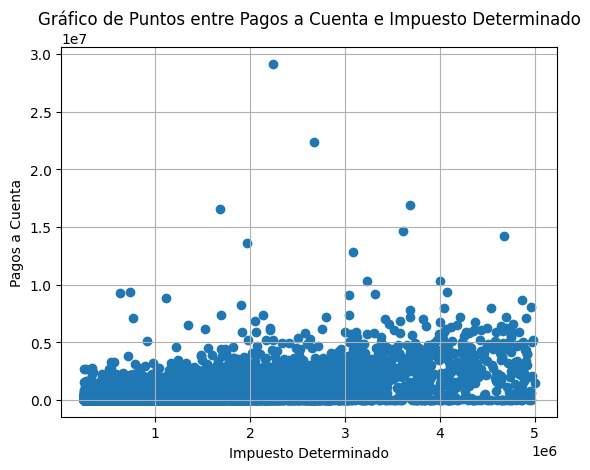

In [6]:
plt.scatter(df['IMPUESTO_DETERMINADO '], df['PAGOS A CUENTA '])
plt.title('Gráfico de Puntos entre Pagos a Cuenta e Impuesto Determinado')
plt.ylabel('Pagos a Cuenta')
plt.xlabel('Impuesto Determinado')
plt.grid(True)

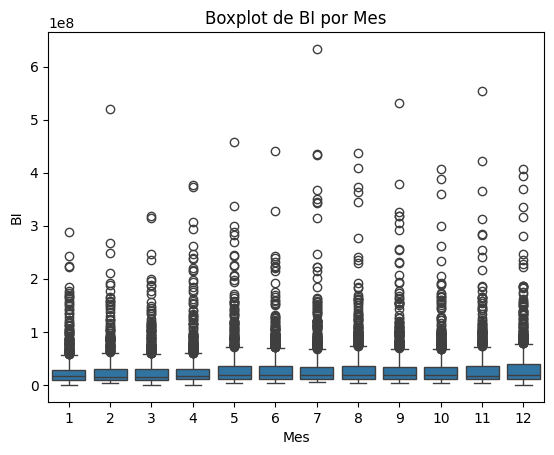

In [7]:
sns.boxplot(x='Mes', y='BASE IMPONIBLE ', data=df)
plt.title('Boxplot de BI por Mes')
plt.xlabel('Mes')
plt.ylabel('BI')
plt.show()

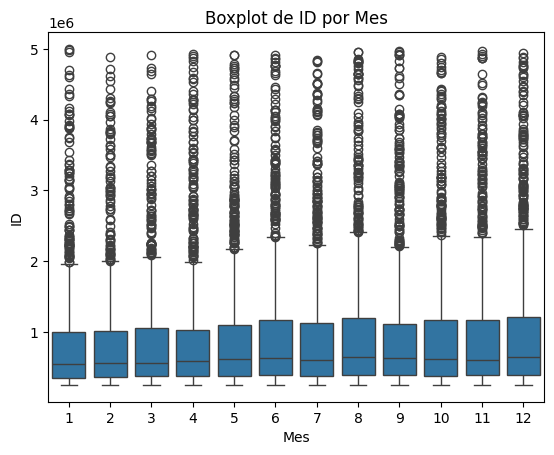

In [8]:
sns.boxplot(x='Mes', y='IMPUESTO_DETERMINADO ', data=df)
plt.title('Boxplot de ID por Mes')
plt.xlabel('Mes')
plt.ylabel('ID')
plt.show()

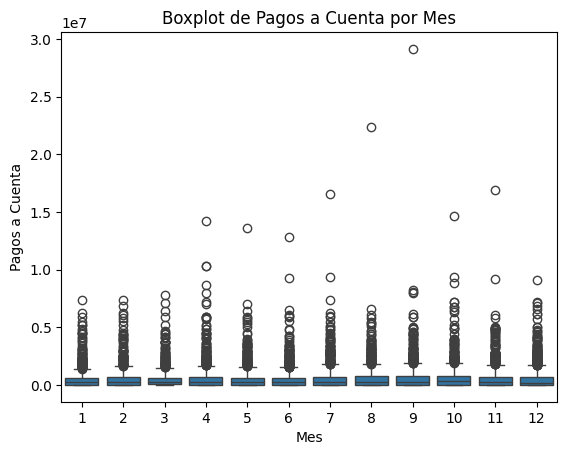

In [10]:
sns.boxplot(x='Mes', y='PAGOS A CUENTA ', data=df)
plt.title('Boxplot de Pagos a Cuenta por Mes')
plt.xlabel('Mes')
plt.ylabel('Pagos a Cuenta')
plt.show()

# Observaciones - Primera Parte
El dataset, considerando las observaciones que incluye, presenta una alta dispersión de valores, con una clara concentración hacia los valores mas bajos si analizamos los bloxplots de Base Imponible, Pagos a Cuenta e Impuesto Determinado por ejemplo. Por ello, ante la alta volatilidad de comportamientos y atendiendo al objetivo del trabajo, se trabajará con valores agrupados del segmento de sujetos. Si analizamos la relación entre el impuesto determinado y los pagos a cuenta, se observa que para la gran mayoría de los montos de impuesto declarado el monto de pagos a cuenta no supera los 500.000 pesos.

# DESCRIPCION DEL DATASET - Segunda Parte

In [11]:
primer_cuartil = np.percentile(df['PAGOS A CUENTA '], 25)
print(f"Primer cuartil de Pagos a Cuenta: {primer_cuartil}")

Primer cuartil de Pagos a Cuenta: 2636.57


In [12]:
tercer_cuartil = np.percentile(df['PAGOS A CUENTA '], 75)
print(f"Tercer cuartil de Pagos a Cuenta: {tercer_cuartil}")

Tercer cuartil de Pagos a Cuenta: 682015.64


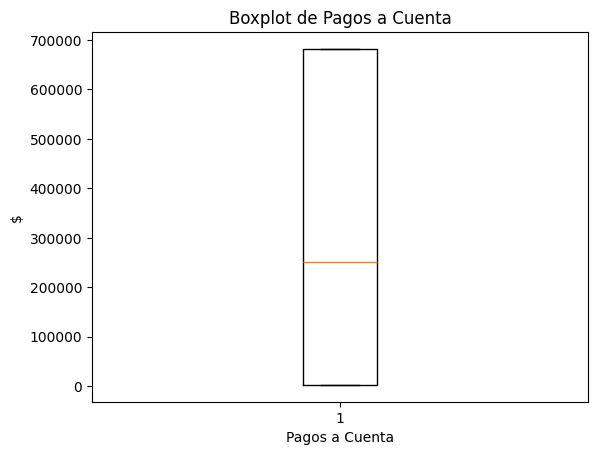

In [13]:
lower_percentile = np.percentile(df['PAGOS A CUENTA '], 25)
upper_percentile = np.percentile(df['PAGOS A CUENTA '], 75)
plt.boxplot(df['PAGOS A CUENTA '], whis=[25, 75], showfliers=False)
plt.title('Boxplot de Pagos a Cuenta')
plt.xlabel('Pagos a Cuenta')
plt.ylabel('$')
plt.show()

Text(0.5, 1.0, 'Boxplot of Central 95% of Monthly Pagos a Cuenta')

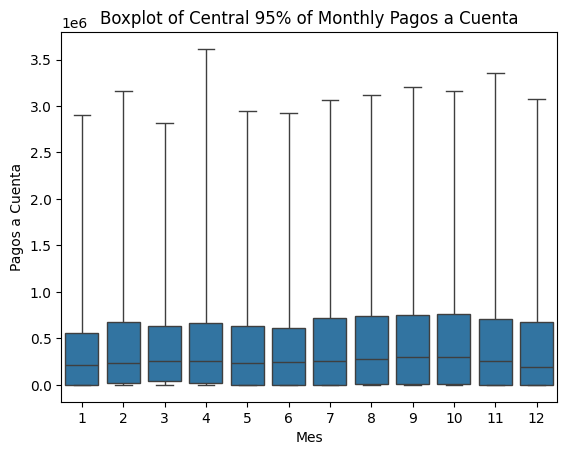

In [15]:
sns.boxplot(x='Mes', y='PAGOS A CUENTA ', data=df, whis=[2.5, 97.5], showfliers=False)
plt.xlabel('Mes')
plt.ylabel('Pagos a Cuenta')
plt.title('Boxplot of Central 95% of Monthly Pagos a Cuenta')


Text(0.5, 1.0, 'Boxplot of Central 95% of Monthly Base Imponible')

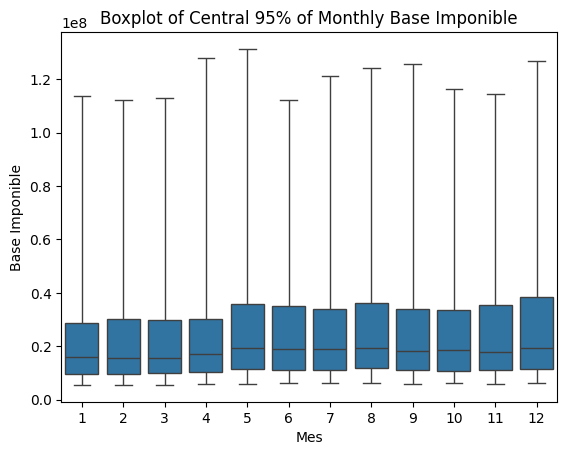

In [16]:
sns.boxplot(x='Mes', y='BASE IMPONIBLE ', data=df, whis=[2.5, 97.5], showfliers=False)
plt.xlabel('Mes')
plt.ylabel('Base Imponible')
plt.title('Boxplot of Central 95% of Monthly Base Imponible')

Text(0.5, 1.0, 'Boxplot of Central 95% of Monthly Impuesto Determinado')

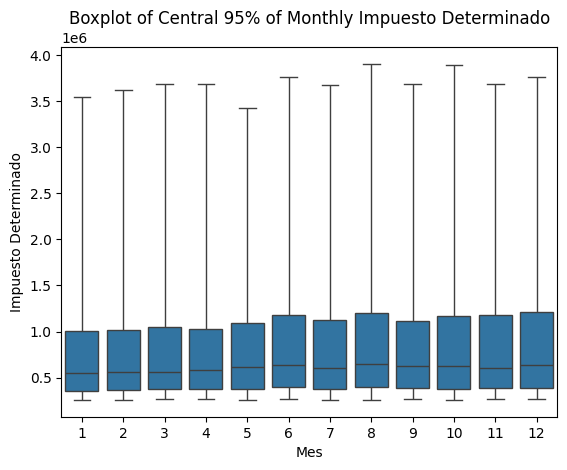

In [17]:
sns.boxplot(x='Mes', y='IMPUESTO_DETERMINADO ', data=df, whis=[2.5, 97.5], showfliers=False)
plt.xlabel('Mes')
plt.ylabel('Impuesto Determinado')
plt.title('Boxplot of Central 95% of Monthly Impuesto Determinado')

# Observaciones - Segunda Parte
Si seleccionamos el 95% central de las observaciones, se puede apreciar mejor la distribución de los valores con una marcada orientación hacia los valores mas chicos, es decir las conclusiones no cambian.

# DESCRIPCION DEL DATASET - Tercera Parte
Considerando los análisis realizados hasta el momento, se recomienda agrupar los valores mensuales de las variables de interés para analizar si existe correlación entre ellas y determinar si es viable realizar la predicción que tiene como objetivo el presente trabajo. Esta tarea de reducción de variables y agrupamiento de las mismas se realiza en función de los resultados arrojados en los análisis de correlación mencionados anteriormente

In [18]:
def currency_formatter(x):
  return "${:,.2f}".format(x)
total_base_imponible_por_mes = df.groupby('Mes')['BASE IMPONIBLE '].sum().apply(currency_formatter)
total_impuesto_determinado_por_mes = df.groupby('Mes')['IMPUESTO_DETERMINADO '].sum().apply(currency_formatter)
total_pagos_a_cuenta_por_mes = df.groupby('Mes')['PAGOS A CUENTA '].sum().apply(currency_formatter)
IPC_mensual = df.groupby('Mes')['IPC '].mean()
EMAE_mensual = df.groupby('Mes')['EMAE '].mean()
print (total_base_imponible_por_mes)
print (total_impuesto_determinado_por_mes)
print (total_pagos_a_cuenta_por_mes)
print(IPC_mensual)
print(EMAE_mensual)

Mes
1     $23,654,973,050.50
2     $22,803,703,769.46
3     $24,138,918,422.14
4     $28,437,442,840.47
5     $36,150,377,606.98
6     $34,057,824,902.08
7     $38,582,182,887.52
8     $36,956,340,214.37
9     $34,257,914,470.55
10    $34,315,577,258.61
11    $34,939,156,020.64
12    $42,643,526,548.69
Name: BASE IMPONIBLE , dtype: object
Mes
1       $797,291,503.29
2       $749,341,260.89
3       $810,868,649.53
4       $904,284,171.93
5     $1,076,465,712.82
6     $1,097,977,675.97
7     $1,155,264,627.05
8     $1,156,698,078.31
9     $1,057,073,548.64
10    $1,108,629,968.79
11    $1,113,486,517.09
12    $1,328,998,773.00
Name: IMPUESTO_DETERMINADO , dtype: object
Mes
1     $446,568,604.23
2     $474,716,862.53
3     $466,950,744.33
4     $604,521,137.30
5     $608,109,184.09
6     $571,272,418.72
7     $704,496,048.47
8     $690,732,361.93
9     $697,253,977.83
10    $704,767,789.70
11    $665,821,074.81
12    $716,544,987.24
Name: PAGOS A CUENTA , dtype: object
Mes
1     4261.53
2

In [19]:
# para analizar correlaciones es necesario eliminar el formato anterior
total_base_imponible_por_mes = df.groupby('Mes')['BASE IMPONIBLE '].sum()
total_impuesto_determinado_por_mes = df.groupby('Mes')['IMPUESTO_DETERMINADO '].sum()
total_pagos_a_cuenta_por_mes = df.groupby('Mes')['PAGOS A CUENTA '].sum()
IPC_mensual = df.groupby('Mes')['IPC '].mean()
EMAE_mensual = df.groupby('Mes')['EMAE '].mean()
print (total_base_imponible_por_mes)
print (total_impuesto_determinado_por_mes)
print (total_pagos_a_cuenta_por_mes)
print(IPC_mensual)
print(EMAE_mensual)

Mes
1     2.365497e+10
2     2.280370e+10
3     2.413892e+10
4     2.843744e+10
5     3.615038e+10
6     3.405782e+10
7     3.858218e+10
8     3.695634e+10
9     3.425791e+10
10    3.431558e+10
11    3.493916e+10
12    4.264353e+10
Name: BASE IMPONIBLE , dtype: float64
Mes
1     7.972915e+08
2     7.493413e+08
3     8.108686e+08
4     9.042842e+08
5     1.076466e+09
6     1.097978e+09
7     1.155265e+09
8     1.156698e+09
9     1.057074e+09
10    1.108630e+09
11    1.113487e+09
12    1.328999e+09
Name: IMPUESTO_DETERMINADO , dtype: float64
Mes
1     4.465686e+08
2     4.747169e+08
3     4.669507e+08
4     6.045211e+08
5     6.081092e+08
6     5.712724e+08
7     7.044960e+08
8     6.907324e+08
9     6.972540e+08
10    7.047678e+08
11    6.658211e+08
12    7.165450e+08
Name: PAGOS A CUENTA , dtype: float64
Mes
1     4261.53
2     4825.79
3     5357.09
4     5830.23
5     6073.72
6     6351.71
7     6607.75
8     6883.44
9     7122.24
10    7313.95
11    7491.43
12    7694.01
Name: IPC , 

In [21]:
correlación_base_imponible_pagos_a_cuenta = total_base_imponible_por_mes.corr(total_pagos_a_cuenta_por_mes)
print (f"Correlación entre Base Imponible y Pagos a Cuenta: {correlación_base_imponible_pagos_a_cuenta}")
correlación_pagos_a_cuenta_impuesto_determinado = total_pagos_a_cuenta_por_mes.corr(total_impuesto_determinado_por_mes)
print (f"Correlación entre Pagos a Cuenta y Impuesto Determinado: {correlación_pagos_a_cuenta_impuesto_determinado}")
correlación_pagos_a_cuenta_IPC = total_pagos_a_cuenta_por_mes.corr(IPC_mensual)
print (f"Correlación entre Pagos a Cuenta e IPC: {correlación_pagos_a_cuenta_IPC}")
correlación_pagos_a_cuenta_EMAE = total_pagos_a_cuenta_por_mes.corr(EMAE_mensual)
print (f"Correlación entre Pagos a Cuenta y EMAE: {correlación_pagos_a_cuenta_EMAE}")

Correlación entre Base Imponible y Pagos a Cuenta: 0.896942436139567
Correlación entre Pagos a Cuenta y Impuesto Determinado: 0.886480959672824
Correlación entre Pagos a Cuenta e IPC: 0.9283714539405726
Correlación entre Pagos a Cuenta y EMAE: 0.6429390313807501


In [22]:
# se construye un nuevo dataframe en función de detectar una alta correlación de los valores mensuales
data = {
    'Impuesto_Determinado_Mensual': total_impuesto_determinado_por_mes,
    'Pagos_a_Cuenta_Mensual': total_pagos_a_cuenta_por_mes,
    'Base_Imponible_Mensual': total_base_imponible_por_mes,
    'IPC_Mensual': IPC_mensual,
    'EMAE_Mensual': EMAE_mensual
}
nuevo_df = pd.DataFrame(data)
print(nuevo_df)

     Impuesto_Determinado_Mensual  Pagos_a_Cuenta_Mensual  \
Mes                                                         
1                    7.972915e+08            4.465686e+08   
2                    7.493413e+08            4.747169e+08   
3                    8.108686e+08            4.669507e+08   
4                    9.042842e+08            6.045211e+08   
5                    1.076466e+09            6.081092e+08   
6                    1.097978e+09            5.712724e+08   
7                    1.155265e+09            7.044960e+08   
8                    1.156698e+09            6.907324e+08   
9                    1.057074e+09            6.972540e+08   
10                   1.108630e+09            7.047678e+08   
11                   1.113487e+09            6.658211e+08   
12                   1.328999e+09            7.165450e+08   

     Base_Imponible_Mensual  IPC_Mensual  EMAE_Mensual  
Mes                                                     
1              2.365497e+10    

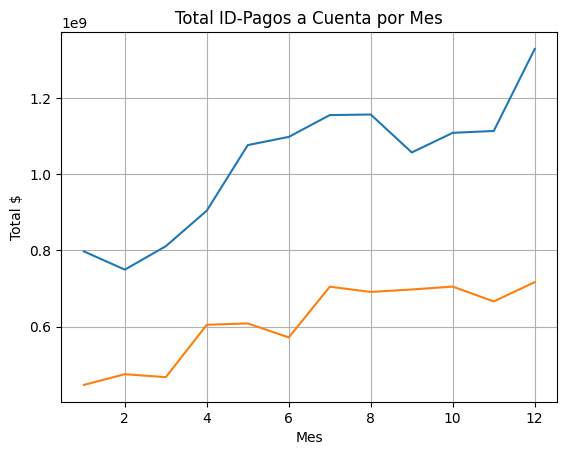

In [23]:
total_impuesto_determinado_por_mes.plot(kind='line')
total_pagos_a_cuenta_por_mes.plot(kind='line')
plt.title('Total ID-Pagos a Cuenta por Mes')
plt.xlabel('Mes')
plt.ylabel('Total $')
plt.grid(True)
plt.show()

# Observaciones - Tercera Parte
Se observan altas correlaciones de los pagos a cuenta cuando se agrupan los valores mensuales de base imponible, impuesto determinado e índice de precios. Es decir que fue adecuada la decisión de reducir la dimensionalidad y agrupar los comportamientos individuales. Por lo expresado, se genera un nuevo dataframe.

# DEFINICION DE VARIABLES PREDICTORAS Y VARIABLE OBJETIVO - DEFINICION DE TRAIN Y TEST - Cuarta Parte

In [25]:
# Defino las variables predictoras (X) y la variable objetivo (y)
# En este caso, X es el nuevo_df sin la columna objetivo
X = nuevo_df.drop('Pagos_a_Cuenta_Mensual', axis=1)
y = nuevo_df['Pagos_a_Cuenta_Mensual']

# Defino los meses para entrenamiento y prueba
meses_train = range(1, 10)  # Meses 1 a 9
meses_test = range(10, 13) # Meses 10 a 12

# Divido los datos en función de los índices (los meses)
X_train = X[X.index.isin(meses_train)]
y_train = y[y.index.isin(meses_train)]

X_test = X[X.index.isin(meses_test)]
y_test = y[y.index.isin(meses_test)]

# Verifico las formas de los conjuntos resultantes
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)


Forma de X_train: (9, 4)
Forma de X_test: (3, 4)
Forma de y_train: (9,)
Forma de y_test: (3,)


# Selección y Prueba de Modelos

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Defino los modelos a probar
models = {
    "Regresión Lineal": LinearRegression(),
    "Árbol de Decisión": DecisionTreeRegressor(random_state=42), # Agregamos random_state para reproducibilidad
    "Bosque Aleatorio": RandomForestRegressor(random_state=42), # Agregamos random_state para reproducibilidad
    "XGBoost": XGBRegressor(random_state=42), # Agregamos random_state para reproducibilidad
    }

# Diccionario para almacenar los resultados de la evaluación
evaluation_results = {}

# Entrenar y evaluar cada modelo
for model_name, model in models.items():
    print(f"Entrenando modelo: {model_name}")

    # Entrenar el modelo
    model.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Evaluar el modelo
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(y_test - y_pred)) # Calcular MAE manualmente


# Calcular R2 en el conjunto de entrenamiento
    y_pred_train = model.predict(X_train)
    r2_train = r2_score(y_train, y_pred_train)

    # Almacenar los resultados
    evaluation_results[model_name] = {
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "R2 (Train)": r2_train

    }

    print(f"Evaluación de {model_name}:")
    print(f"  MSE: {mse:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  MAE: {mae:.2f}")
    print(f"  R2_Train: {r2_train:.2f}")
    print("-" * 30)




Entrenando modelo: Regresión Lineal
Evaluación de Regresión Lineal:
  MSE: 1243856011089913.25
  RMSE: 35268342.90
  MAE: 33654503.70
  R2_Train: 0.94
------------------------------
Entrenando modelo: Árbol de Decisión
Evaluación de Árbol de Decisión:
  MSE: 320914128048392.25
  RMSE: 17914076.25
  MAE: 16998551.22
  R2_Train: 1.00
------------------------------
Entrenando modelo: Bosque Aleatorio
Evaluación de Bosque Aleatorio:
  MSE: 439586505521715.81
  RMSE: 20966318.36
  MAE: 20595980.40
  R2_Train: 0.94
------------------------------
Entrenando modelo: XGBoost
Evaluación de XGBoost:
  MSE: 436682023265598.81
  RMSE: 20896938.13
  MAE: 18753042.04
  R2_Train: 1.00
------------------------------


# Observaciones - Cuarta Parte
Se detallan las métricas y la selección del mejor modelo. Las conclusiones a las que se arriba no contradicen las preguntas de investigación, mas bien las validan y se obtiene el objetivo buscado que es predecir el monto global mensual de pagos a cuenta para los últimos meses del año 2024 con resultados satisfactorios.

In [33]:
# Convierto los resultados a un DataFrame para una mejor visualización
evaluation_df = pd.DataFrame(evaluation_results).T
print("\nTabla de Resultados de Evaluación:")
display(evaluation_df)


# Identifico el mejor modelo basado en una métrica R2 train
best_model_R2_Train = evaluation_df['R2 (Train)'].idxmax()
print(f"\nEl modelo con el mejor R2 (Train) es: {best_model_R2_Train}")

# Identifico el mejor modelo basado en una métrica MAE
best_model_MAE = evaluation_df['MAE'].idxmin()
print(f"\nEl modelo con el mejor MAE es: {best_model_MAE}")

# Identifico el mejor modelo basado en una métrica RMSE
best_model_RMSE = evaluation_df['RMSE'].idxmin()
print(f"\nEl modelo con el mejor RMSE es: {best_model_RMSE}")

# Identifico el mejor modelo basado en una métrica MSE
best_model_MSE = evaluation_df['MSE'].idxmin()
print(f"\nEl modelo con el mejor MSE es: {best_model_MSE}")


Tabla de Resultados de Evaluación:


,MSE,RMSE,MAE,R2 (Train)
Regresión Lineal,1.243856e+15,3.526834e+07,3.365450e+07,0.942120
Árbol de Decisión,3.209141e+14,1.791408e+07,1.699855e+07,1.000000
Bosque Aleatorio,4.395865e+14,2.096632e+07,2.059598e+07,0.944398
XGBoost,4.366820e+14,2.089694e+07,1.875304e+07,1.000000



El modelo con el mejor R2 (Train) es: Árbol de Decisión

El modelo con el mejor MAE es: Árbol de Decisión

El modelo con el mejor RMSE es: Árbol de Decisión

El modelo con el mejor MSE es: Árbol de Decisión


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

models = {
    "Regresión Lineal": LinearRegression(),
    "Árbol de Decisión": DecisionTreeRegressor(random_state=42),
    "Bosque Aleatorio": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    }

# Diccionario para almacenar las predicciones por modelo
predictions_by_model = {}

# Entrenar cada modelo y almacenar las predicciones
for model_name, model in models.items():
    print(f"Entrenando modelo: {model_name}")

    # Entrenar el modelo
    model.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Almacenar las predicciones asociadas con el índice de X_test (que son los meses)
    predictions_by_model[model_name] = pd.Series(y_pred, index=X_test.index)

    print(f"Predicciones del modelo {model_name} para los meses de test:")
    # Esta parte del código imprime el mes y la predicción
    for month, prediction in predictions_by_model[model_name].items():
        print(f"  Mes {month}: {prediction:.2f}") # Aquí se imprime el valor predicho por cada mes
    print("-" * 30)

# Creo un DataFrame con todas las predicciones y los valores reales para una mejor comparación
comparison_df = pd.DataFrame({
    'Valor Real': y_test
})

for model_name, predictions in predictions_by_model.items():
    comparison_df[f'Predicción_{model_name}'] = predictions

print("\nTabla Comparativa de Valores Reales y Predicciones:")
display(comparison_df)

Entrenando modelo: Regresión Lineal
Predicciones del modelo Regresión Lineal para los meses de test:
  Mes 10: 658567750.84
  Mes 11: 686216914.58
  Mes 12: 750912619.72
------------------------------
Entrenando modelo: Árbol de Decisión
Predicciones del modelo Árbol de Decisión para los meses de test:
  Mes 10: 690732361.93
  Mes 11: 690732361.93
  Mes 12: 704496048.47
------------------------------
Entrenando modelo: Bosque Aleatorio
Predicciones del modelo Bosque Aleatorio para los meses de test:
  Mes 10: 680900425.19
  Mes 11: 680900425.19
  Mes 12: 693703760.92
------------------------------
Entrenando modelo: XGBoost
Predicciones del modelo XGBoost para los meses de test:
  Mes 10: 696517248.00
  Mes 11: 696517248.00
  Mes 12: 699232576.00
------------------------------

Tabla Comparativa de Valores Reales y Predicciones:


,Valor Real,Predicción_Regresión Lineal,Predicción_Árbol de Decisión,Predicción_Bosque Aleatorio,Predicción_XGBoost
Mes,,,,,
10,7.047678e+08,6.585678e+08,6.907324e+08,6.809004e+08,696517248.0
11,6.658211e+08,6.862169e+08,6.907324e+08,6.809004e+08,696517248.0
12,7.165450e+08,7.509126e+08,7.044960e+08,6.937038e+08,699232576.0
